In [1]:
from DQbee import *
import sympy as sp
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Latex

------------------- Import Dqbee -------------------
---------- Dqbee Module loaded successfully ----------


### Example of the proof for Proposition 2

---

Here we use the **Example 3** in the paper to illustrate the proof for Proposition 2. Consider the following system:
$$
x_1^{\prime}=-3 x_1+x_2^4, \quad x_2^{\prime}=-2 x_2+x_1^2 .
$$
By applying Algorithm 1, we introduce the following new variables to obtain the inner-quadratic system:
$$
y_1=x_1^2, \quad y_2=x_2^2, \quad y_3=x_1 x_2, \quad y_4=x_2^3=x_2 y_2
$$
Then we got the inner-quadratic system:
\begin{align*}
q_1(x, y) \text{ part:} \\
x_1' &= -3x_1 + y_2^2 \\
x_2' &= -2x_2 + x_1^2
\end{align*}

\begin{align*}
q_2(x, y) \text{ part:} \\
y_1' &= 2y_4y_3 - 6x_1^2 \\
y_2' &= 2y_1x_2 - 4x_2^2 \\
y_3' &= y_4y_2 + y_1x_1 - 5x_1x_2 \\
y_4' &= 3y_1y_2 - 6y_2x_2
\end{align*}

In [3]:
x1, x2, y1, y2, y3, y4, z1, z2, z3, z4 = sp.symbols(
    'x1 x2 y1 y2 y3 y4 z1 z2 z3 z4')
x1_d, x2_d, y1_d, y2_d, y3_d, y4_d, z1_d, z2_d, z3_d, z4_d = sp.symbols(
    'x1_d x2_d y1_d y2_d y3_d y4_d z1_d z2_d z3_d z4_d')
lambda_ = sp.symbols('lambda')
t = sp.symbols('t')

substitutions_y = {
    y1: z1 + x1**2,
    y2: z2 + x2**2,
    y3: z3 + x1 * x2,
    y4: z4 + x2**3
}


### Step 2 - compute $\mathbf{x}^{\prime}=\widetilde{\mathbf{q}}_1(\mathbf{x}, \mathbf{z})$ and $\mathbf{z}^{\prime}=\widetilde{\mathbf{q}}_2(\mathbf{x}, \mathbf{z})$

---

In [4]:
example_system = [
    sp.Eq(sp.Derivative(x1, t), -3 * x1 + y2 ** 2),
    sp.Eq(sp.Derivative(x2, t), -2 * x2 + x1 ** 2),
    sp.Eq(sp.Derivative(y1, t), 2 * y4 * y3 - 6 * x1 ** 2),
    sp.Eq(sp.Derivative(y2, t), 2 * y1 * x2 - 4 * x2 ** 2 ),
    sp.Eq(sp.Derivative(y3, t), y4 * y2 + y1 * x1 - 5 * x1 * x2 ),
    sp.Eq(sp.Derivative(y4, t), 3 * y1 * y2 - 6 * y2 * x2)
]

for i in range(len(example_system)):
    rhs = example_system[i].rhs
    rhs = rhs.subs(substitutions_y)
    lhs_latex = sp.latex(example_system[i].lhs)
    rhs_latex = sp.latex(rhs.expand())
    display(Latex(f'${lhs_latex} = {rhs_latex}$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
dict_subs_tlide = {
    x1_d: -3 * x1 + x2 ** 4 + 2 * x2 ** 2 * z2 + z2 ** 2,
    x2_d: -2 * x2 + x1 ** 2,
    y1: - 6 * x1**2 + 2 * x1 * x2**4 + 2 * x1 * x2 * z4 + 2 * x2**3 * z3 + 2 * z3 * z4,
    y2: 2 * x1**2 * x2 - 4 * x2**2 + 2 * x2 * z1,
    y3: x1**3 - 5 * x1 * x2 + x1 * z1 + x2**5 + x2**3 * z2 + x2**2 * z4 + z2 * z4,
    y4: 3 * x1**2 * x2**2 + 3 * x1**2 * z2 - 6 * x2**3 + 3 * x2**2 * z1 - 6 * x2 * z2 + 3 * z1 * z2
}

differential_q2 = [
    sp.Eq(sp.Derivative(z1 ,t), y1 - 2 * x1 * x1_d),
    sp.Eq(sp.Derivative(z2 ,t), y2 - 2 * x2 * x2_d),
    sp.Eq(sp.Derivative(z3 ,t), y3 - x1 * x2_d - x2 * x1_d),
    sp.Eq(sp.Derivative(z4 ,t), y4 - 3 * x2 ** 2 * x2_d)
]

for i in range(len(differential_q2)):
    rhs = differential_q2[i].rhs
    rhs = rhs.subs(dict_subs_tlide).expand()
    lhs_latex = sp.latex(differential_q2[i].lhs)
    rhs_latex = sp.latex(rhs)
    display(Latex(f'${lhs_latex} = {rhs_latex}$'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Therefore, we have the following system:
$$
\begin{gathered}
\mathbf{x}^{\prime}=\widetilde{\mathbf{q}}_1(\mathbf{x}, \mathbf{z}):\left\{\begin{array}{l}
x_1^{\prime}=-3 x_1+x_2^4+2 x_2^2 z_2+z_2^2 \\
x_2^{\prime}=x_1^2-2 x_2
\end{array}\right. \\\\
\mathbf{z}^{\prime}=\widetilde{\mathbf{q}}_2(\mathbf{x}, \mathbf{z}):\left\{\begin{array}{l}
z_1^{\prime}=-4 x_1 x_2^2 z_2+2 x_1 x_2 z_4-2 x_1 z_2^2+2 x_2^3 z_3+2 z_3 z_4 \\
z_2^{\prime}=2 x_2 z_1 \\
z_3^{\prime}=x_1 z_1-x_2^3 z_2+x_2^2 z_4-x_2 z_2^2+z_2 z_4 \\
z_4^{\prime}=3x_1^2 z_2+3 x_2^2 z_1-6 x_2 z_2+3 z_1 z_2
\end{array}\right.
\end{gathered}
$$

In [6]:
system_tilde = [
    sp.Eq(sp.Derivative(x1, t), -3 * x1 + x2**4 + 2 * x2**2 * z2 + z2**2),
    sp.Eq(sp.Derivative(x2, t), x1**2 - 2 * x2),
    sp.Eq(sp.Derivative(z1, t), -4 * x1 * x2**2 * z2 + 2 * x1 * x2 * z4 -
          2 * x1 * z2**2 + 2 * x2**3 * z3 + 2 * z3 * z4),
    sp.Eq(sp.Derivative(z2, t), 2 * x2 * z1),
    sp.Eq(sp.Derivative(z3, t), x1 * z1 - x2**3 * z2 + x2**2 * z4 - x2 * z2**2 + z2 * z4),
    sp.Eq(sp.Derivative(z4, t), 3 * x1**2 * z2 + 3 * x2**2 * z1 - 6 * x2 * z2 + 3 * z1 * z2),
]

### Step 3 - Compute the Jacobian matrix of system_tilde

---

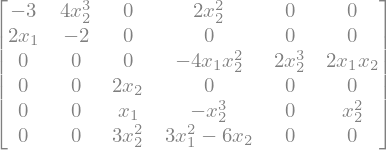

In [7]:
rhs_system = [eq.rhs for eq in system_tilde]
jacobian_matrix = sp.Matrix(rhs_system).jacobian([x1, x2, z1, z2, z3, z4])
substitutions = {z1: 0, z2: 0, z3: 0, z4: 0}
jacobian_substituted = jacobian_matrix.subs(substitutions)
sp.init_printing(use_latex=True)
display(jacobian_substituted)

### Step 4 - Compute $\tilde{\mathbf{q}}_{2, \lambda}(\mathbf{x}, \mathbf{z})$

---

We take an arbitrary parameter $\lambda \in \mathbb{R}$ and consider $\mathbf{q}_{2, \lambda}(\mathbf{x}, \mathbf{y})$ as the following:
$$
\mathbf{q}_{2, \lambda}(\mathbf{x}, \mathbf{y})=\mathbf{q}_2(\mathbf{x}, \mathbf{y})-\lambda \mathbf{h}(\mathbf{x}, \mathbf{y})=\left\{\begin{array}{l}
2 y_4 y_3-6 x_1^2-\lambda\left(y_1-x_1^2\right) \\
2 y_1 x_2-4 x_2^2-\lambda\left(y_2-x_2^2\right) \\
y_4 y_2+y_1 x_1-5 x_1 x_2-\lambda\left(y_3-x_1 x_2\right) \\
3 y_1 y_2-6 y_2 x_2-\lambda\left(y_4-x_2 y_2\right)
\end{array}\right.
$$

In [8]:
example_system = [
    sp.Eq(sp.Derivative(x1), -3 * x1 + y2 ** 2),
    sp.Eq(sp.Derivative(x2), -2 * x2 + x1 ** 2),
    sp.Eq(sp.Derivative(y1), 2 * y4 * y3 - 6 * x1 ** 2 - lambda_ * (y1 - x1**2)),
    sp.Eq(sp.Derivative(y2), 2 * y1 * x2 - 4 * x2 ** 2 - lambda_ * (y2 - x2**2)),
    sp.Eq(sp.Derivative(y3), y4 * y2 + y1 * x1 - 5 * x1 * x2 - lambda_ * (y3 - x1 * x2)),
    sp.Eq(sp.Derivative(y4), 3 * y1 * y2 - 6 * y2 * x2 - lambda_ * (y4 - x2*y2))
]

for i in range(len(example_system)):
    rhs = example_system[i].rhs
    rhs = rhs.subs(substitutions_y)
    lhs_latex = sp.latex(example_system[i].lhs)
    rhs_latex = sp.latex(rhs.expand())
    display(Latex(f'${lhs_latex} = {rhs_latex}$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [9]:
dict_subs_tlide = {
    x1_d: -3 * x1 + x2 ** 4 + 2 * x2 ** 2 * z2 + z2 ** 2,
    x2_d: -2 * x2 + x1 ** 2,
    y1: -lambda_ * z1 - 6 * x1**2 + 2 * x1 * x2**4 + 2 * x1 * x2 * z4 + 2 * x2**3 * z3 + 2 * z3 * z4,
    y2: -lambda_ * z2 + 2 * x1**2 * x2 - 4 * x2**2 + 2 * x2 * z1,
    y3: -lambda_ * z3 + x1**3 - 5 * x1 * x2 + x1 * z1 + x2**5 + x2**3 * z2 + x2**2 * z4 + z2 * z4,
    y4: lambda_ * x2 * z2 - lambda_ * z4 + 3 * x1**2 * x2**2 + 3 * x1**2 * z2 - 6 * x2**3 + 3 * x2**2 * z1 - 6 * x2 * z2 + 3 * z1 * z2
}

differential_q2 = [
    sp.Eq(sp.Derivative(z1 ,t), y1 - 2 * x1 * x1_d),
    sp.Eq(sp.Derivative(z2 ,t), y2 - 2 * x2 * x2_d),
    sp.Eq(sp.Derivative(z3 ,t), y3 - x1 * x2_d - x2 * x1_d),
    sp.Eq(sp.Derivative(z4 ,t), y4 - 3 * x2 ** 2 * x2_d)
]

for i in range(len(differential_q2)):
    rhs = differential_q2[i].rhs
    rhs = rhs.subs(dict_subs_tlide).expand()
    lhs_latex = sp.latex(differential_q2[i].lhs)
    rhs_latex = sp.latex(rhs)
    display(Latex(f'${lhs_latex} = {rhs_latex}$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

With the same method of coordinates change, we obtain:
$$
\tilde{\mathbf{q}}_{2, \lambda}=\left\{\begin{array}{l}
\left(-4 x_1 x_2^2 z_2+2 x_1 x_2 z_4-2 x_1 z_2^2+2 x_2^3 z_3+2 z_3 z_4\right)+-\lambda z_1 \\
\left(2 x_2 z_1\right)-\lambda z_2 \\
\left(x_1 z_1-x_2^3 z_2+x_2^2 z_4-x_2 z_2^2+z_2 z_4\right)-\lambda z_3 \\
\left(3x_1^2 z_2+3 x_2^2 z_1-6 x_2 z_2+3 z_1 z_2\right)-\lambda\left(z_4-x_2 z_2\right)
\end{array}=\widetilde{\mathbf{q}}_2-\lambda \mathbf{h}(\mathbf{x}, \mathbf{z}+\mathbf{g}(\mathbf{x}))\right.
$$
where we have
$$
\mathbf{h}(\mathbf{x}, \mathbf{z}+\mathbf{g}(\mathbf{x}))=\left\{\begin{array}{l}
\left(z_1+x_1^2\right)-x_1^2=z_1 \\
\left(z_2+x_2^2\right)-x_2^2=z_2 \\
\left(z_3+x_1 x_2\right)-x_1 x_2=z_3 \\
\left(z_4+x_2^3\right)-x_2\left(z_2+x_2^2\right)=z_4-x_2 z_2
\end{array}\right.
$$
Taking the Jacobian of $\mathbf{h}$ against $\mathbf{z}$, we got
$$
\left.\lambda J_{\mathbf{z}}(\mathbf{h})\right)\left.\right|_{\mathbf{x}=\mathbf{x}^a, \mathbf{z}=\mathbf{0}}=\lambda\left[\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & x_2 & 0 & 1
\end{array}\right]
$$
which is a lower-triangular matrix with ones on the diagonal.